# Let's prepare uploading packages and our dataset

In [1]:
#Uploading necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading of the datasets
df_main = pd.read_parquet('main_dataset.parquet')
df_credit = pd.read_parquet('credit_reports.parquet')

df_main.set_index('customer_id', inplace=True)
df_credit.set_index('customer_id', inplace=True)

# Let's clean our main dataframe

In [3]:
print(df_main.shape)
df_main.head()

(14454, 16)


,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m
customer_id,,,,,,,,,,,,,,,,
1223,1,2021-08-23 13:57:56,2022-04-26 07:00:00,2022-10-20 18:26:35,5,0,245,1.0,2022-04-25,2022-04-25,1.0,0.0,2022-04-26 02:15:17.742,2022-04-26 02:15:17.742,91.0,91.0
5190,2,2022-04-26 09:57:25,2022-04-26 07:00:00,2022-12-22 18:03:32,2,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
5194,3,2022-04-26 12:22:35,2022-04-26 07:00:00,2022-08-09 17:31:05,4,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
3978,4,2022-03-09 11:26:55,2022-04-26 07:00:00,2022-11-11 19:48:08,2,0,47,1.0,2022-03-17,2022-03-17,2.0,0.0,2022-03-19 22:02:50.555,2022-03-09 16:41:49.675,13.0,13.0
4535,5,2022-04-01 14:28:42,2022-04-26 07:00:00,2022-07-24 12:07:15,2,0,24,1.0,2022-04-01,2022-04-01,1.0,0.0,2022-04-01 19:37:56.185,2022-04-01 19:37:56.185,21.0,21.0


# Let's remember the meaning of our variables

- 'customer_id': internal id for customer
- 'loan_id': id of loan 
- 'ACC_CREATION_DATETIME': date in which the account was created 
- 'APPLICATION_DATETIME': date in which the customer applied to a loan, 
- 'LOAN_ORIGINATION_DATETIME': date in which the loan was disbursed. 
- 'max_days_late': maximum days late in the first 77 days since loan 
origination. 
- 'target': 1 if 34 days late or more in 77 days of contract, 0 otherwise. 
- 'account_to_application_days': days from account creation to 
application. 
- 'n_sf_apps': number of previous applications to smartphone financing 
product 
- 'first_app_date': first application date 
- 'last_app_date': last application date 
- 'n_bnpl_apps': number of previous applications to bnpl product 
- 'n_bnpl_approved_apps': number of previous bnpl applications 
approved 
- 'first_bnpl_app_date': first bnpl application date 
- 'last_bnpl_app_date': last bnpl application date 
- 'n_inquiries_l3m': inquiries to credit reports from external entities in 
the last 3 months. 
- 'n_inquiries_l6m': inquiries to credit reports from external entities in 
the last 6 months.

In [4]:
df_main.info() #Get information from the main dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 14454 entries, 1223 to 12079
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_id                      14454 non-null  int64         
 1   ACC_CREATION_DATETIME        14454 non-null  datetime64[us]
 2   APPLICATION_DATETIME         14454 non-null  datetime64[us]
 3   LOAN_ORIGINATION_DATETIME    14454 non-null  datetime64[us]
 4   max_days_late                14454 non-null  int64         
 5   target                       14454 non-null  int64         
 6   account_to_application_days  14454 non-null  int64         
 7   n_sf_apps                    6806 non-null   float64       
 8   first_app_date               6806 non-null   datetime64[us]
 9   last_app_date                6806 non-null   datetime64[us]
 10  n_bnpl_apps                  8739 non-null   float64       
 11  n_bnpl_approved_apps         8739 non-null 

'first_app_date', 'last_app_date','first_bnpl_app_date','last_bnpl_app_date' are redundant data considering we have variables like account_to_application_days, and It's better to know how much time has been since than knowing the exact date if we want to calculate how risky a person is

In [5]:
df_main.drop(columns = ['first_app_date', 'last_app_date','first_bnpl_app_date','last_bnpl_app_date'], inplace = True) #Delete these columns

In [6]:
df_main.info() #Get information from the credit dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 14454 entries, 1223 to 12079
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_id                      14454 non-null  int64         
 1   ACC_CREATION_DATETIME        14454 non-null  datetime64[us]
 2   APPLICATION_DATETIME         14454 non-null  datetime64[us]
 3   LOAN_ORIGINATION_DATETIME    14454 non-null  datetime64[us]
 4   max_days_late                14454 non-null  int64         
 5   target                       14454 non-null  int64         
 6   account_to_application_days  14454 non-null  int64         
 7   n_sf_apps                    6806 non-null   float64       
 8   n_bnpl_apps                  8739 non-null   float64       
 9   n_bnpl_approved_apps         8739 non-null   float64       
 10  n_inquiries_l3m              9083 non-null   float64       
 11  n_inquiries_l6m              9083 non-null 

Now, we only have null values in n_sf_apps n_bnpl_app,   n_bnpl_approved_ap, 0  n_inquiries_, 11  n_inquiries and I think it only can mean that the customer didn't ask for any loan until now (If our data is updated), that's why we'll assign 0 to our NaN values_l6m

In [7]:
df_main.fillna(0, inplace = True) #Fill all NaN with 0's, they didn't asked for a loan before this one

In [8]:
df_main.info() #Get information from the credit dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 14454 entries, 1223 to 12079
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_id                      14454 non-null  int64         
 1   ACC_CREATION_DATETIME        14454 non-null  datetime64[us]
 2   APPLICATION_DATETIME         14454 non-null  datetime64[us]
 3   LOAN_ORIGINATION_DATETIME    14454 non-null  datetime64[us]
 4   max_days_late                14454 non-null  int64         
 5   target                       14454 non-null  int64         
 6   account_to_application_days  14454 non-null  int64         
 7   n_sf_apps                    14454 non-null  float64       
 8   n_bnpl_apps                  14454 non-null  float64       
 9   n_bnpl_approved_apps         14454 non-null  float64       
 10  n_inquiries_l3m              14454 non-null  float64       
 11  n_inquiries_l6m              14454 non-null

We don't want to have datetime data, that's why we'll convert them to data more manageable and after that we'll delete those columns

In [9]:
#Create a new colummn who tell us how many days are between application and loan origination
df_main['application_to_loan_origination days'] = (df_main['LOAN_ORIGINATION_DATETIME']-df_main['APPLICATION_DATETIME']).dt.days

In [10]:
df_main.drop(columns = ['ACC_CREATION_DATETIME', 'APPLICATION_DATETIME', 'LOAN_ORIGINATION_DATETIME'], inplace = True) #Delete these columns

In [11]:
df_main.info() #Get information from the credit dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 14454 entries, 1223 to 12079
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   loan_id                               14454 non-null  int64  
 1   max_days_late                         14454 non-null  int64  
 2   target                                14454 non-null  int64  
 3   account_to_application_days           14454 non-null  int64  
 4   n_sf_apps                             14454 non-null  float64
 5   n_bnpl_apps                           14454 non-null  float64
 6   n_bnpl_approved_apps                  14454 non-null  float64
 7   n_inquiries_l3m                       14454 non-null  float64
 8   n_inquiries_l6m                       14454 non-null  float64
 9   application_to_loan_origination days  14454 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.2 MB


Let's see if all our data is differente in every column, if there's any column that has the same value all the way, We'll delete that column because it won't affect our model

In [12]:
df_main.describe() #Let's see if there are at least one different value in every column with std

,loan_id,max_days_late,target,account_to_application_days,n_sf_apps,n_bnpl_apps,n_bnpl_approved_apps,n_inquiries_l3m,n_inquiries_l6m,application_to_loan_origination days
count,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000
mean,7227.500000,14.225889,0.186800,163.489000,0.778816,0.738688,0.160163,6.504289,10.755085,29.711914
std,4172.654731,21.738445,0.389764,181.110989,1.427504,0.880064,0.486034,16.393688,20.185963,45.533121
min,1.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,3614.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,7227.500000,2.000000,0.000000,103.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11.000000
75%,10840.750000,20.000000,0.000000,271.750000,1.000000,1.000000,0.000000,0.000000,15.000000,36.000000
max,14454.000000,70.000000,1.000000,901.000000,42.000000,18.000000,15.000000,170.000000,213.000000,351.000000


There are at least one different value in every colum, we can see it with the std, this is different from 0 

Let's drop duplicates if we have them

In [13]:
df_main.drop_duplicates(inplace = True) #Let's delete our duplicates

In [14]:
df_main.info() #Get information from the credit dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 14454 entries, 1223 to 12079
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   loan_id                               14454 non-null  int64  
 1   max_days_late                         14454 non-null  int64  
 2   target                                14454 non-null  int64  
 3   account_to_application_days           14454 non-null  int64  
 4   n_sf_apps                             14454 non-null  float64
 5   n_bnpl_apps                           14454 non-null  float64
 6   n_bnpl_approved_apps                  14454 non-null  float64
 7   n_inquiries_l3m                       14454 non-null  float64
 8   n_inquiries_l6m                       14454 non-null  float64
 9   application_to_loan_origination days  14454 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.2 MB


There weren't duplicates

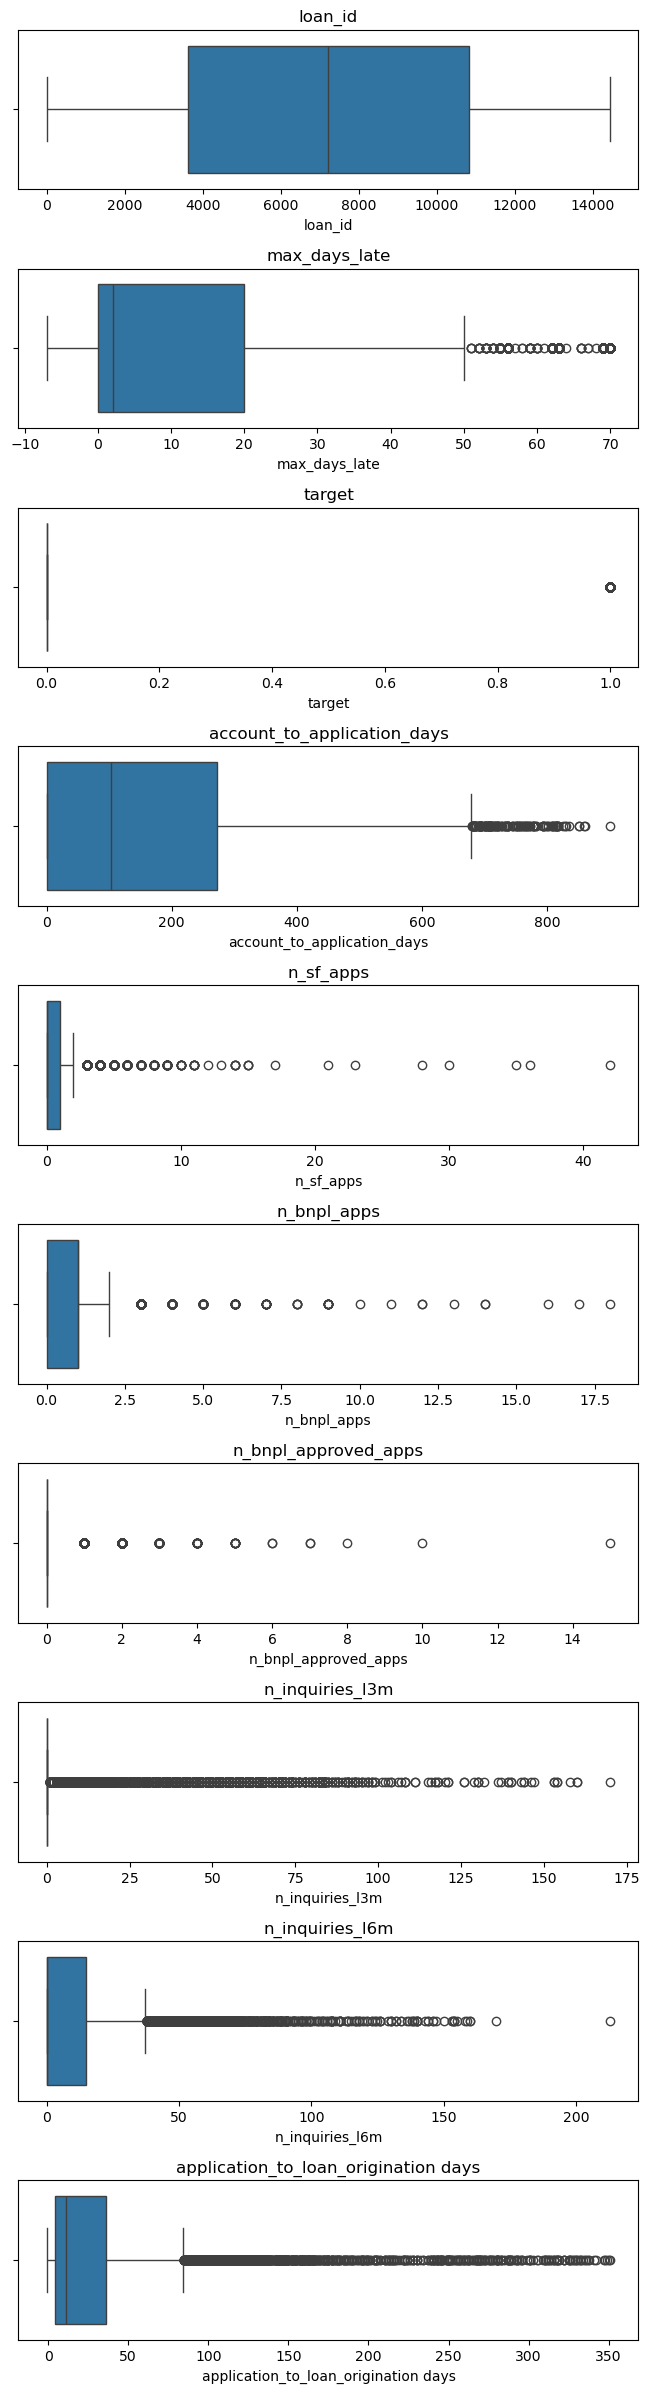

In [15]:
# Let's generate individual plots for our variables to see anomalies
cols = ['loan_id', 'max_days_late', 'target', 'account_to_application_days',
        'n_sf_apps', 'n_bnpl_apps', 'n_bnpl_approved_apps', 'n_inquiries_l3m',
        'n_inquiries_l6m', 'application_to_loan_origination days']

fig, ax = plt.subplots(nrows = 10, ncols = 1, figsize = (8,30))
fig.subplots_adjust(hspace = 0.5)

for i, col in enumerate(cols):
    sns.boxplot(x=col, data = df_main, ax = ax[i])
    ax[i].set_title(col)

There aren't anomalies in the data, we could  think max_days_late has anomalies, because we have negative days, but it could be people who pays days before their payment day

# Now let's clean our credit dataframe

In [16]:
print(df_credit.shape)
df_credit.head()

(287356, 28)


,INQUIRY_TIME,CDC_INQUIRY_ID,INQUIRY_DATE,PREVENTION_KEY,CURRENCY,MAX_CREDIT,CREDIT_LIMIT,PAYMENT_AMOUNT,UPDATE_DATE,LOAN_OPENING_DATE,...,ACCOUNT_TYPE,RESPONSABILITY_TYPE,TOTAL_PAYMENTS,DELAYED_PAYMENTS,CURRENT_PAYMENT,WORST_DELAY,TOTAL_REPORTED_PAYMENTS,CURRENT_BALANCE,BALANCE_DUE,BALANCE_DUE_WORST_DELAY
customer_id,,,,,,,,,,,,,,,,,,,,,
4223,2022-04-01 00:32:36.689000+00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,1244.0,9900.0,1244.0,2022-02-28,2019-08-30,...,PAGOS FIJOS,INDIVIDUAL (TITULAR),12.0,7,13,13.0,0,1244.0,1244.0,1244.0
4223,2022-04-01 00:32:36.689000+00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,1722.0,9900.0,1722.0,2022-02-28,2020-04-21,...,REVOLVENTE,INDIVIDUAL (TITULAR),0.0,3,13,13.0,0,1722.0,1722.0,1722.0
4223,2022-04-01 00:32:36.689000+00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,6346.0,0.0,482.0,2022-03-28,2021-12-17,...,PAGOS FIJOS,INDIVIDUAL (TITULAR),16.0,0,V,0.0,0,943.0,0.0,0.0
3490,2022-02-15 02:30:22.086000+00:00,622857-6b4e9d95-7491-40c3-bccd-442de7f94c58,2022-02-15,SIN OBSERVACION,PESOS MEXICANOS,11600.0,0.0,232.0,2022-02-01,2021-03-02,...,PAGOS FIJOS,INDIVIDUAL (TITULAR),100.0,4,01,1.0,0,6185.0,116.0,116.0
6486,2022-06-25 01:57:14.868000+00:00,875073-46a5f149-19db-4193-b92a-b8f41fb3e896,2022-06-25,SIN OBSERVACION,PESOS MEXICANOS,2452.0,16800.0,2452.0,2021-09-30,2019-02-22,...,REVOLVENTE,INDIVIDUAL (TITULAR),0.0,19,13,13.0,0,2452.0,2452.0,2452.0


In [17]:
df_credit.info() #Get information from the credit dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 287356 entries, 4223 to 12079
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   INQUIRY_TIME             287356 non-null  datetime64[us, UTC]
 1   CDC_INQUIRY_ID           287267 non-null  object             
 2   INQUIRY_DATE             287267 non-null  datetime64[us]     
 3   PREVENTION_KEY           287267 non-null  object             
 4   CURRENCY                 287267 non-null  object             
 5   MAX_CREDIT               287174 non-null  float64            
 6   CREDIT_LIMIT             278999 non-null  float64            
 7   PAYMENT_AMOUNT           287267 non-null  float64            
 8   UPDATE_DATE              287267 non-null  datetime64[us]     
 9   LOAN_OPENING_DATE        287267 non-null  datetime64[us]     
 10  LOAN_CLOSING_DATE        192609 non-null  datetime64[us]     
 11  WORST_DELAY_DATE

In [18]:
#Delete rows without any loan opening date and any credit limit, they obviously can't even ask for a credit
df_credit.dropna(subset = ['LOAN_OPENING_DATE', 'CREDIT_LIMIT'], inplace = True)

In [19]:
df_credit.info() #Get information from the credit dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 278999 entries, 4223 to 12079
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   INQUIRY_TIME             278999 non-null  datetime64[us, UTC]
 1   CDC_INQUIRY_ID           278999 non-null  object             
 2   INQUIRY_DATE             278999 non-null  datetime64[us]     
 3   PREVENTION_KEY           278999 non-null  object             
 4   CURRENCY                 278999 non-null  object             
 5   MAX_CREDIT               278906 non-null  float64            
 6   CREDIT_LIMIT             278999 non-null  float64            
 7   PAYMENT_AMOUNT           278999 non-null  float64            
 8   UPDATE_DATE              278999 non-null  datetime64[us]     
 9   LOAN_OPENING_DATE        278999 non-null  datetime64[us]     
 10  LOAN_CLOSING_DATE        187150 non-null  datetime64[us]     
 11  WORST_DELAY_DATE

In [20]:
""" 
Let's delete our worst delay date because we already have worst_delay, which is the maximum number of due payments, and balance_due_worst, which is
the worst amount due, It's  kind of repetitive the data.

We'll also delete the columns last_purchase_date and last_payment_date because they don't represent a really important information to know if a person
is or not a risky person.
""" 
df_credit.drop(columns = ['WORST_DELAY_DATE', 'LAST_PURCHASE_DATE', 'LAST_PAYMENT_DATE', 'CDC_INQUIRY_ID'], inplace = True)

In [21]:
df_credit.info() #Get information from the credit dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 278999 entries, 4223 to 12079
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   INQUIRY_TIME             278999 non-null  datetime64[us, UTC]
 1   INQUIRY_DATE             278999 non-null  datetime64[us]     
 2   PREVENTION_KEY           278999 non-null  object             
 3   CURRENCY                 278999 non-null  object             
 4   MAX_CREDIT               278906 non-null  float64            
 5   CREDIT_LIMIT             278999 non-null  float64            
 6   PAYMENT_AMOUNT           278999 non-null  float64            
 7   UPDATE_DATE              278999 non-null  datetime64[us]     
 8   LOAN_OPENING_DATE        278999 non-null  datetime64[us]     
 9   LOAN_CLOSING_DATE        187150 non-null  datetime64[us]     
 10  REPORT_DATE              278999 non-null  datetime64[us]     
 11  PAYMENT_FREQUENC

In [22]:
'''
Let's create a new column that indicates that the person has a loan at the moment and delete the columns called LOAN_OPENING_DATE and LOAN_CLOSING_DATE
'''
df_credit['LOANS_OPENED'] = df_credit['LOAN_CLOSING_DATE'].isna().astype(int)
df_credit.drop(columns = ['LOAN_OPENING_DATE', 'LOAN_CLOSING_DATE'], inplace = True)

In [23]:
df_credit.info() #Get information from the credit dataset to visualize variables

<class 'pandas.core.frame.DataFrame'>
Index: 278999 entries, 4223 to 12079
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   INQUIRY_TIME             278999 non-null  datetime64[us, UTC]
 1   INQUIRY_DATE             278999 non-null  datetime64[us]     
 2   PREVENTION_KEY           278999 non-null  object             
 3   CURRENCY                 278999 non-null  object             
 4   MAX_CREDIT               278906 non-null  float64            
 5   CREDIT_LIMIT             278999 non-null  float64            
 6   PAYMENT_AMOUNT           278999 non-null  float64            
 7   UPDATE_DATE              278999 non-null  datetime64[us]     
 8   REPORT_DATE              278999 non-null  datetime64[us]     
 9   PAYMENT_FREQUENCY        278999 non-null  object             
 10  BUSINESS_TYPE            278999 non-null  object             
 11  CREDIT_TYPE     

In [24]:
'''
let's fill our Nan values with 0 because we have NaN values in places where we don't have data in the columns: MAX_CREDIT, TOTAL_PAYMENTS, WORST_DELAY,
TOTAL_REPORTED_PAYMENTS
'''
df_credit.fillna(0, inplace = True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278999 entries, 4223 to 12079
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   INQUIRY_TIME             278999 non-null  datetime64[us, UTC]
 1   INQUIRY_DATE             278999 non-null  datetime64[us]     
 2   PREVENTION_KEY           278999 non-null  object             
 3   CURRENCY                 278999 non-null  object             
 4   MAX_CREDIT               278999 non-null  float64            
 5   CREDIT_LIMIT             278999 non-null  float64            
 6   PAYMENT_AMOUNT           278999 non-null  float64            
 7   UPDATE_DATE              278999 non-null  datetime64[us]     
 8   REPORT_DATE              278999 non-null  datetime64[us]     
 9   PAYMENT_FREQUENCY        278999 non-null  object             
 10  BUSINESS_TYPE            278999 non-null  object             
 11  CREDIT_TYPE     

In [25]:
'''
I tried to delete the outdated information, but every information has more than 3 months of delay, that's why I didn't delete any information and
I'll delete now our columns of dates now I don't need them
'''
df_credit.drop(columns = ['INQUIRY_TIME', 'INQUIRY_DATE', 'UPDATE_DATE', 'REPORT_DATE'], inplace = True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278999 entries, 4223 to 12079
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PREVENTION_KEY           278999 non-null  object 
 1   CURRENCY                 278999 non-null  object 
 2   MAX_CREDIT               278999 non-null  float64
 3   CREDIT_LIMIT             278999 non-null  float64
 4   PAYMENT_AMOUNT           278999 non-null  float64
 5   PAYMENT_FREQUENCY        278999 non-null  object 
 6   BUSINESS_TYPE            278999 non-null  object 
 7   CREDIT_TYPE              278999 non-null  object 
 8   ACCOUNT_TYPE             278999 non-null  object 
 9   RESPONSABILITY_TYPE      278999 non-null  object 
 10  TOTAL_PAYMENTS           278999 non-null  float64
 11  DELAYED_PAYMENTS         278999 non-null  object 
 12  CURRENT_PAYMENT          278999 non-null  object 
 13  WORST_DELAY              278999 non-null  float64
 14  TOTAL_R

In [26]:
# Let's see if there's any unnecesary column to delete it in our columns with object type
object_cols = ['PREVENTION_KEY','CURRENCY','PAYMENT_FREQUENCY','BUSINESS_TYPE','CREDIT_TYPE', 'ACCOUNT_TYPE', 'RESPONSABILITY_TYPE', 'DELAYED_PAYMENTS'
              , 'CURRENT_PAYMENT','TOTAL_REPORTED_PAYMENTS']

for col in object_cols:
    print(f'colummn {col}: {df_credit[col].nunique()} sublevels')

colummn PREVENTION_KEY: 31 sublevels
colummn CURRENCY: 3 sublevels
colummn PAYMENT_FREQUENCY: 11 sublevels
colummn BUSINESS_TYPE: 58 sublevels
colummn CREDIT_TYPE: 32 sublevels
colummn ACCOUNT_TYPE: 6 sublevels
colummn RESPONSABILITY_TYPE: 5 sublevels
colummn DELAYED_PAYMENTS: 97 sublevels
colummn CURRENT_PAYMENT: 86 sublevels
colummn TOTAL_REPORTED_PAYMENTS: 1 sublevels


In [27]:
# TOTAL_REPORTED_PAYMENTS only have 1 type of data, so... Let's delete it... This won't affect to our result
df_credit.drop(columns = ['TOTAL_REPORTED_PAYMENTS'], inplace =  True)

df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278999 entries, 4223 to 12079
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PREVENTION_KEY           278999 non-null  object 
 1   CURRENCY                 278999 non-null  object 
 2   MAX_CREDIT               278999 non-null  float64
 3   CREDIT_LIMIT             278999 non-null  float64
 4   PAYMENT_AMOUNT           278999 non-null  float64
 5   PAYMENT_FREQUENCY        278999 non-null  object 
 6   BUSINESS_TYPE            278999 non-null  object 
 7   CREDIT_TYPE              278999 non-null  object 
 8   ACCOUNT_TYPE             278999 non-null  object 
 9   RESPONSABILITY_TYPE      278999 non-null  object 
 10  TOTAL_PAYMENTS           278999 non-null  float64
 11  DELAYED_PAYMENTS         278999 non-null  object 
 12  CURRENT_PAYMENT          278999 non-null  object 
 13  WORST_DELAY              278999 non-null  float64
 14  CURRENT

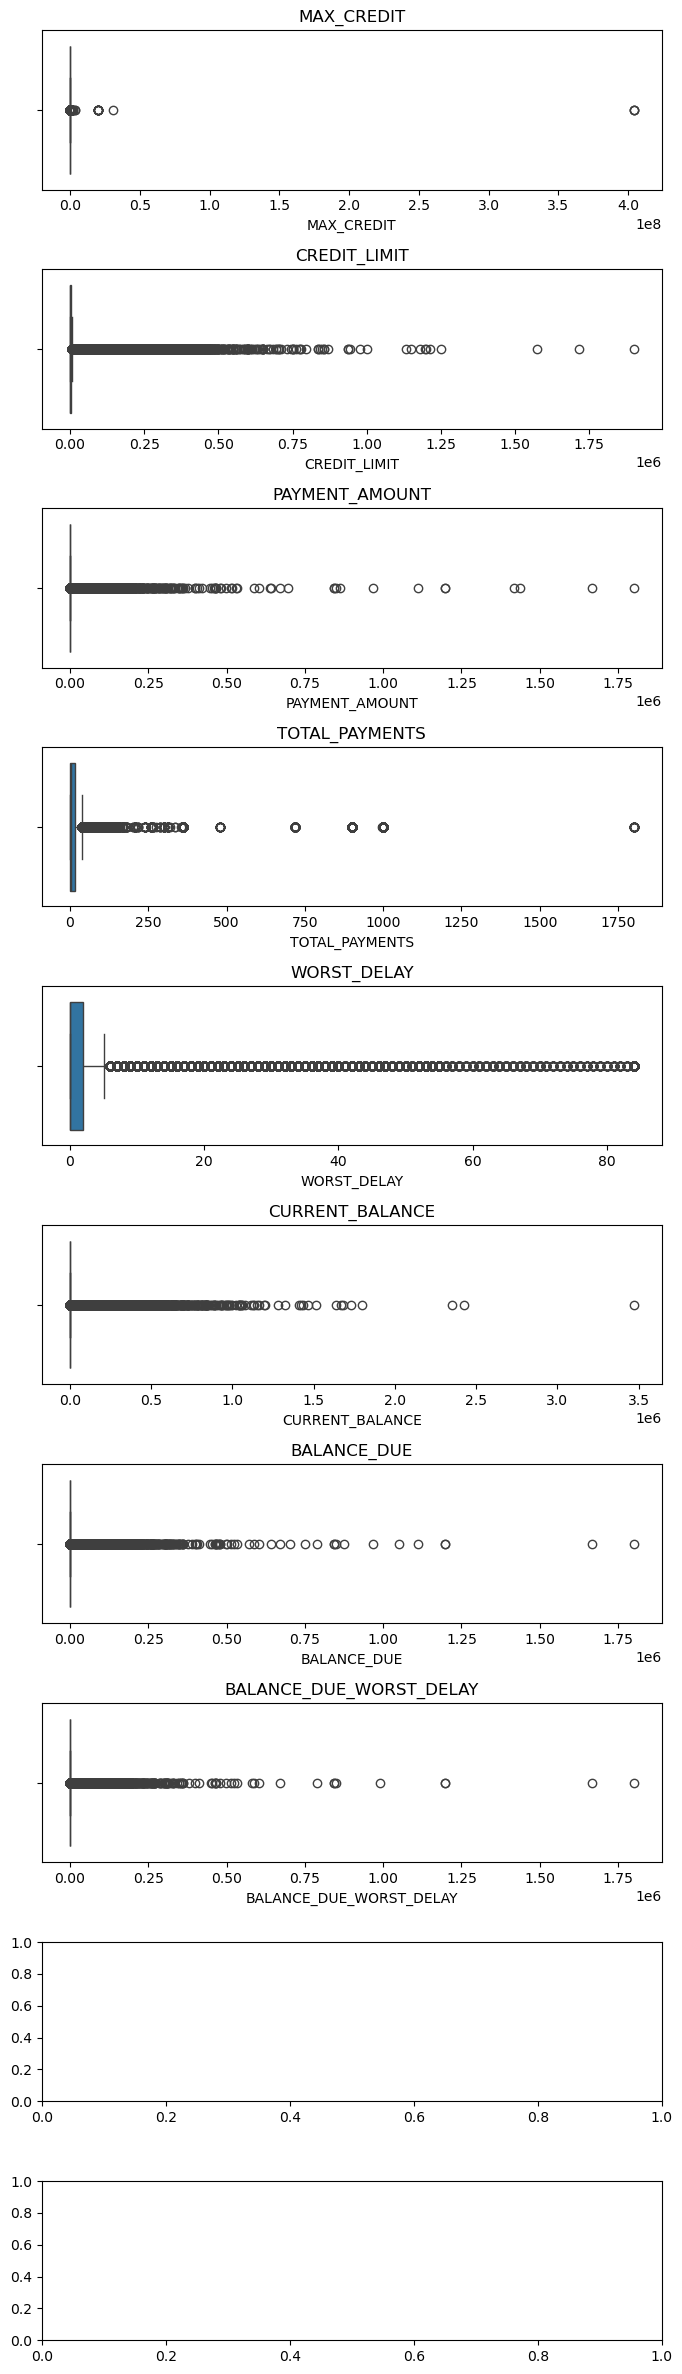

In [28]:
# Let's generate individual plots for our variables to see anomalies
cols = ['MAX_CREDIT', 'CREDIT_LIMIT','PAYMENT_AMOUNT','TOTAL_PAYMENTS','WORST_DELAY', 'CURRENT_BALANCE','BALANCE_DUE', 'BALANCE_DUE_WORST_DELAY']

fig, ax = plt.subplots(nrows = 10, ncols = 1, figsize = (8,30))
fig.subplots_adjust(hspace = 0.5)

for i, col in enumerate(cols):
    sns.boxplot(x=col, data = df_credit, ax = ax[i])
    ax[i].set_title(col)

There aren't any anomaly

In [29]:
# Now, let's analyze if there are any unnecesary column in the int and float type
df_credit.describe()

,MAX_CREDIT,CREDIT_LIMIT,PAYMENT_AMOUNT,TOTAL_PAYMENTS,WORST_DELAY,CURRENT_BALANCE,BALANCE_DUE,BALANCE_DUE_WORST_DELAY,LOANS_OPENED
count,2.789990e+05,2.789990e+05,2.789990e+05,278999.000000,278999.000000,2.789990e+05,2.789990e+05,2.789990e+05,278999.000000
mean,1.528375e+04,5.525842e+03,1.659230e+03,21.533246,4.280298,4.532181e+03,2.059745e+03,1.720995e+03,0.329209
std,1.332157e+06,2.788269e+04,1.304746e+04,87.444944,12.321563,3.514039e+04,1.393032e+04,1.181380e+04,0.469927
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.380000e+02,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2.234000e+03,4.000000e+02,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,7.332000e+03,3.000000e+03,1.470000e+02,16.000000,2.000000,2.640000e+02,0.000000e+00,2.000000e+02,1.000000
max,4.040404e+08,1.900000e+06,1.800000e+06,1800.000000,84.000000,3.469743e+06,1.800000e+06,1.800000e+06,1.000000


subniveles de PREVENTION_KEY: ['SIN OBSERVACION' 'CUENTA CANCELADA O CERRADA'
 'CUENTA REESTRUCTURADA SIN PAGO MENOR POR MODIFICACION DE LA SITUACION DEL CLIENTE'
 'CUENTA EN COBRANZA' 'CUENTA QUE CAUSA QUEBRANTO'
 'CUENTA QUE NO ESTA AL CORRIENTE VENDIDA O CEDIDA A UN NO USUARIO DE UNA SOCIEDAD'
 'CUENTA QUE NO ESTA AL CORRIENTE VENDIDA O CEDIDA A UN USUARIO DE UNA SOCIEDAD'
 'CUENTA INACTIVA'
 'CUENTA CERRADA QUE ESTUVO EN COBRANZA Y FUE PAGADA SIN CAUSAR QUEBRANTO'
 'EJECUCION DE GARANTIA PRENDARIA O FIDUCIARIA EN PAGO POR CREDITO'
 'PEGO MENOR POR PROGRAMA INSTITUCIONAL DE GOBIERNO'
 'CONVENIO DE FINIQUITO O PAGO MENOR'
 'TARJETA DE CREDITO EXTRAVIADA O ROBADA' 'DEMANDA POR EL OTORGANTE'
 'EN LOCALIZACION' 'CONVENIO Y DISMINUCION DE PAGO'
 'PRORROGA POR PERDIDA DE EMPLEO'
 'CARTERA AL CORRIENTE VENDIDA O CEDIDA A UN USUARIO DE UNA SOCIEDAD'
 'DACION EN PAGO O RENTA' 'ADJUDICACION O APLICACION DE GARANTIA'
 'CUENTA AL CORRIENTE VENDIDA O CEDIDA A UN NO USUARIO DE UNA SOCIEDAD'
 'CUE

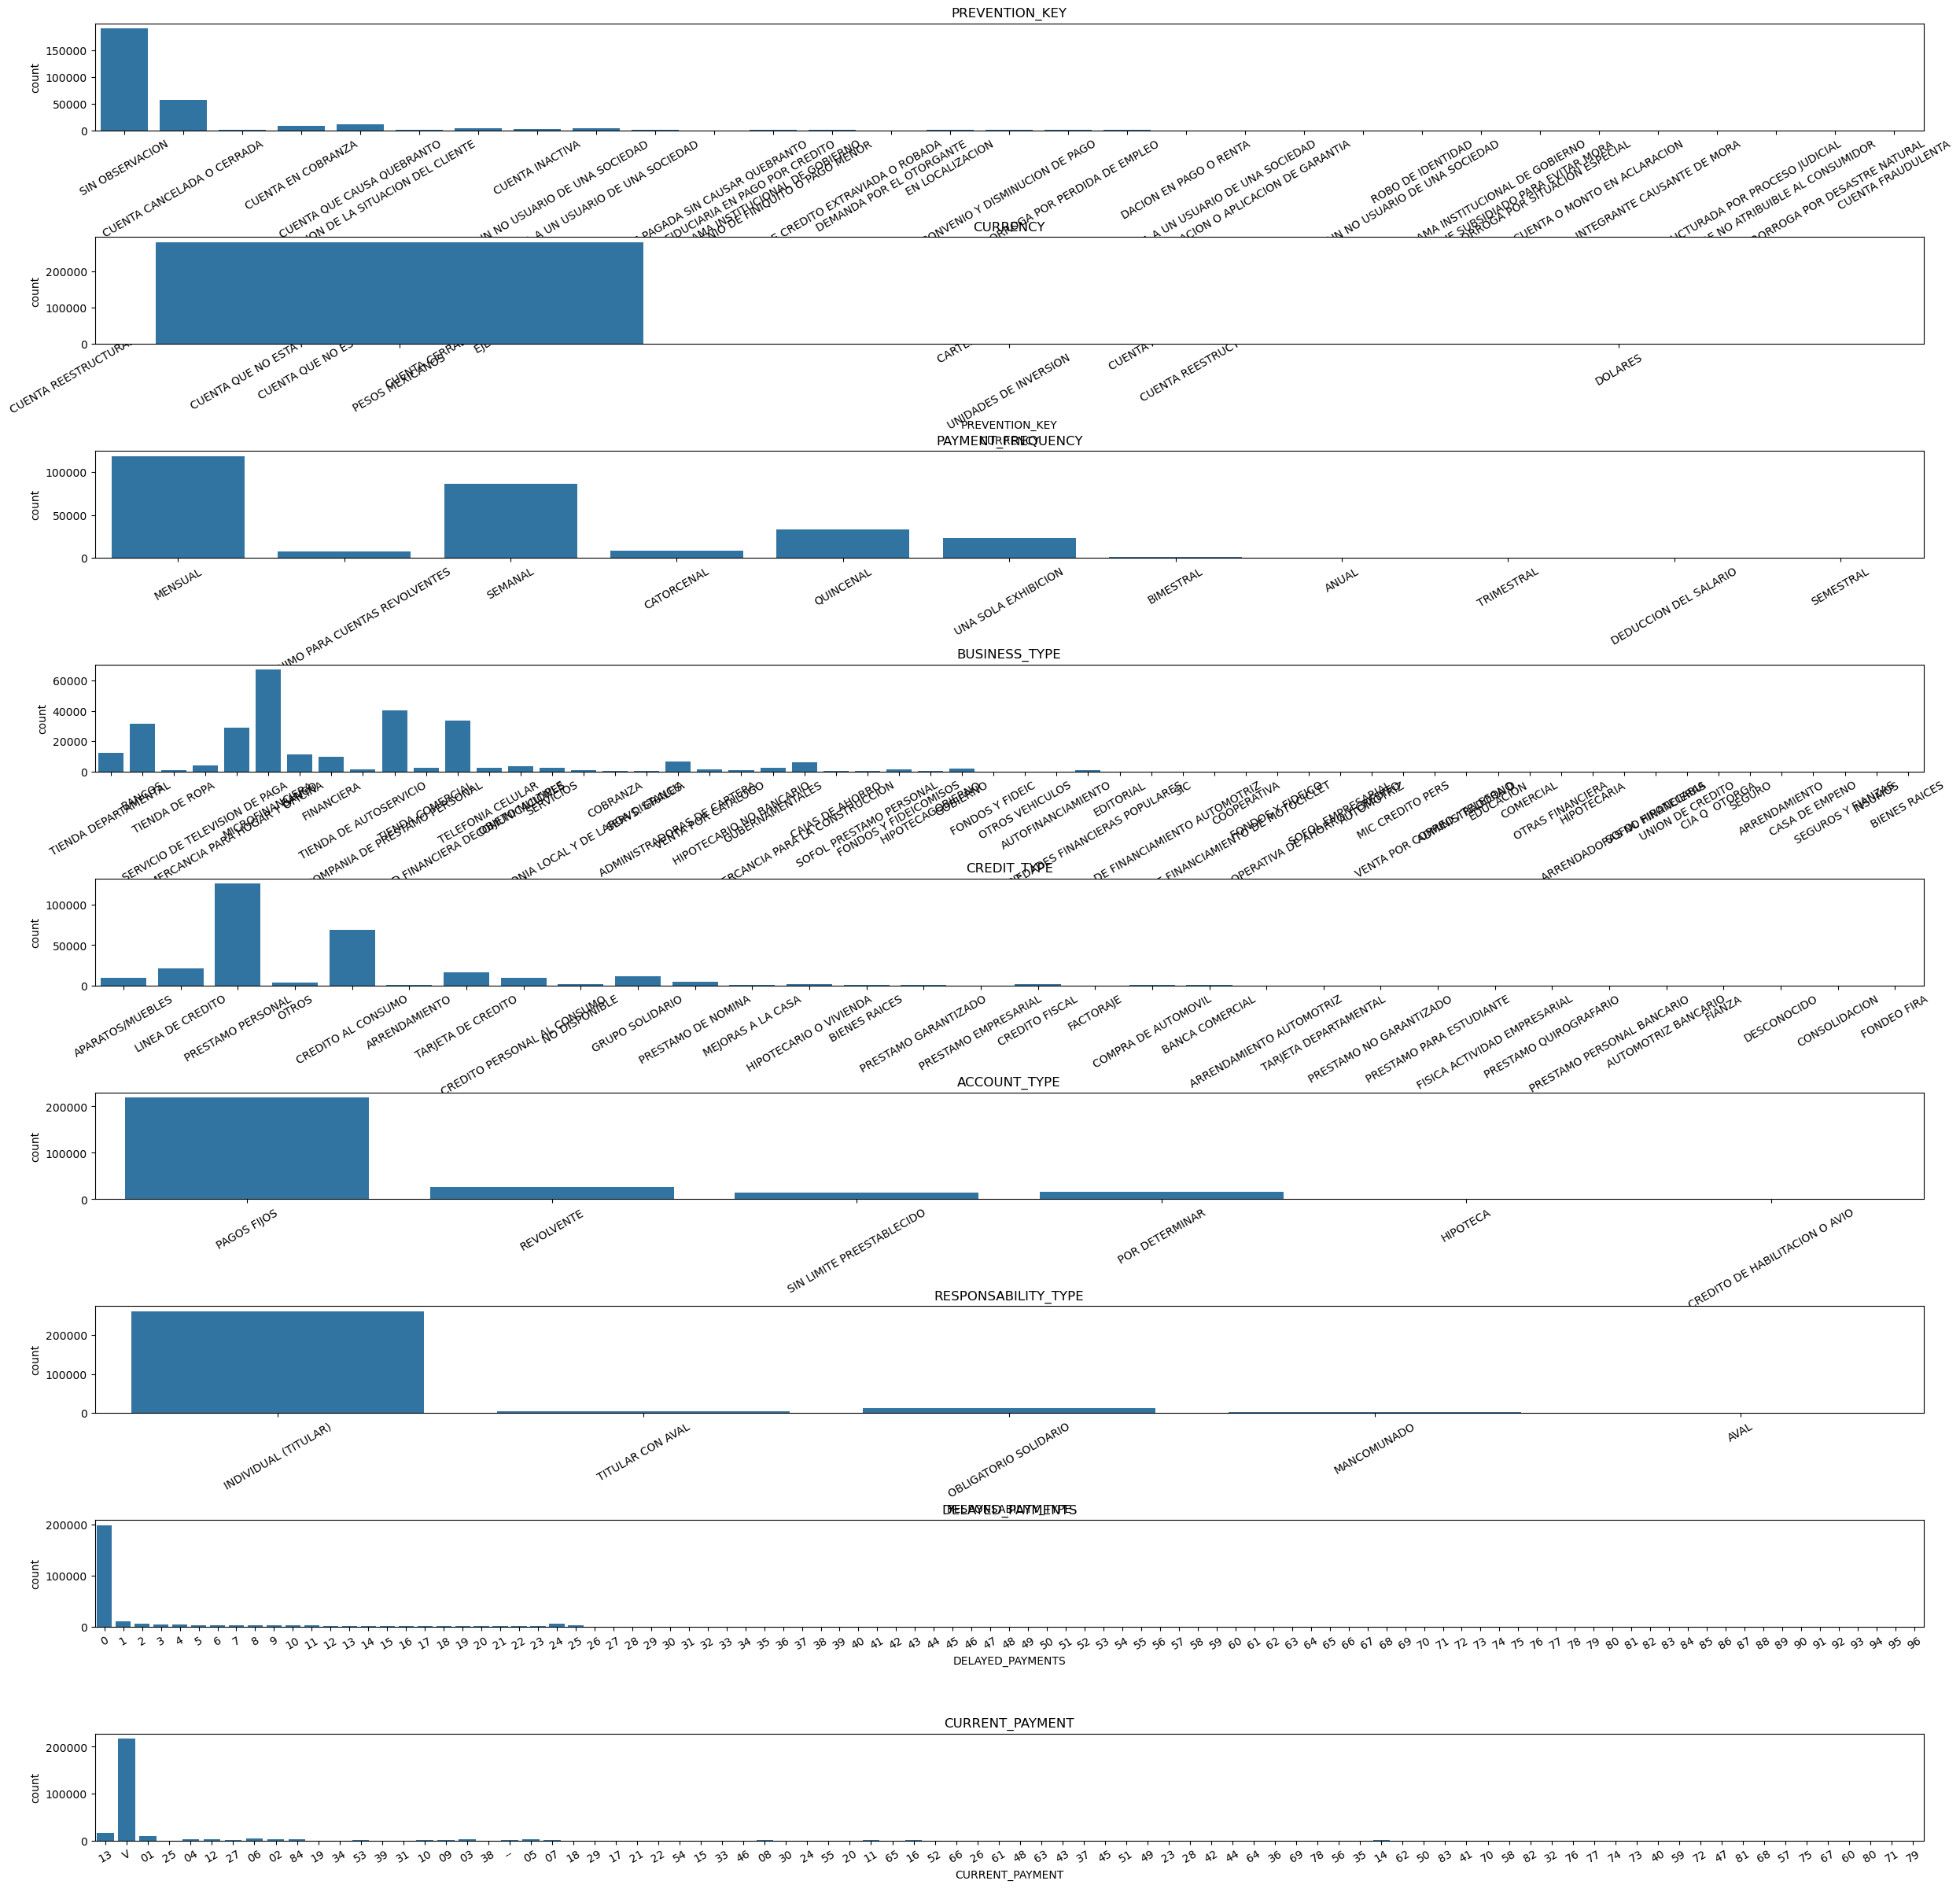

In [30]:
#Let's analyze every object type column with their histogram and their sublevel

object_cols = ['PREVENTION_KEY','CURRENCY','PAYMENT_FREQUENCY','BUSINESS_TYPE','CREDIT_TYPE', 'ACCOUNT_TYPE', 'RESPONSABILITY_TYPE', 'DELAYED_PAYMENTS'
              , 'CURRENT_PAYMENT']

fig, ax = plt.subplots(nrows  = 9, ncols = 1, figsize = (30,30))
fig.subplots_adjust(hspace = 1)

for i, col in enumerate(object_cols):
    sns.countplot(x=col, data = df_credit, ax = ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=30)

for col in object_cols:
    print(f'subniveles de {col}: {df_credit[col].unique()}')

Here we get two insights:

- Every column is completely different, there aren't gramatical errors or something like that
- We have some variables with object type and we could change it to a numeric type directly (or almost directly)
- Some data could be deleted to simplify our cleaning without creating a big bias

In [31]:
'''
Let's just keep our data with MXN values, the other currencies are not relevant because it's just a small proportion of all our data
Also, let's delete our data who has '--' values in CURRENT_PAYMENT column, again, it's just a small proportion of our total data (In total will be 0.3%
deleted)
'''

df_credit = df_credit[df_credit['CURRENCY'].isin(['PESOS MEXICANOS'])]
df_credit = df_credit[~df_credit['CURRENT_PAYMENT'].isin(['--'])]

#Then, we'll delete our column currency
df_credit.drop('CURRENCY', axis = 1, inplace = True) 

df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278156 entries, 4223 to 12079
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PREVENTION_KEY           278156 non-null  object 
 1   MAX_CREDIT               278156 non-null  float64
 2   CREDIT_LIMIT             278156 non-null  float64
 3   PAYMENT_AMOUNT           278156 non-null  float64
 4   PAYMENT_FREQUENCY        278156 non-null  object 
 5   BUSINESS_TYPE            278156 non-null  object 
 6   CREDIT_TYPE              278156 non-null  object 
 7   ACCOUNT_TYPE             278156 non-null  object 
 8   RESPONSABILITY_TYPE      278156 non-null  object 
 9   TOTAL_PAYMENTS           278156 non-null  float64
 10  DELAYED_PAYMENTS         278156 non-null  object 
 11  CURRENT_PAYMENT          278156 non-null  object 
 12  WORST_DELAY              278156 non-null  float64
 13  CURRENT_BALANCE          278156 non-null  float64
 14  BALANCE

In [32]:
#Let's replace 'V' in CURRENT_PAYMENT with 0 due to 'V' is a payment in time

df_credit['CURRENT_PAYMENT'] = df_credit['CURRENT_PAYMENT'].replace('V', 00)

In [33]:
#We can see now that every value in Delayed_Payments and Current_payment are numbers, so... let's change type of our data
df_credit['DELAYED_PAYMENTS'] = df_credit['DELAYED_PAYMENTS'].astype(int)
df_credit['CURRENT_PAYMENT'] = df_credit['CURRENT_PAYMENT'].astype(int)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278156 entries, 4223 to 12079
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PREVENTION_KEY           278156 non-null  object 
 1   MAX_CREDIT               278156 non-null  float64
 2   CREDIT_LIMIT             278156 non-null  float64
 3   PAYMENT_AMOUNT           278156 non-null  float64
 4   PAYMENT_FREQUENCY        278156 non-null  object 
 5   BUSINESS_TYPE            278156 non-null  object 
 6   CREDIT_TYPE              278156 non-null  object 
 7   ACCOUNT_TYPE             278156 non-null  object 
 8   RESPONSABILITY_TYPE      278156 non-null  object 
 9   TOTAL_PAYMENTS           278156 non-null  float64
 10  DELAYED_PAYMENTS         278156 non-null  int32  
 11  CURRENT_PAYMENT          278156 non-null  int32  
 12  WORST_DELAY              278156 non-null  float64
 13  CURRENT_BALANCE          278156 non-null  float64
 14  BALANCE

In [34]:
#Let's assign a number of severity to every prevention key from 0 to 5 where 5 is the most serious thing, and 0 is not serious

severity_dict = {
    'SIN OBSERVACION': 0,
    'CUENTA CANCELADA O CERRADA': 0,
    'CUENTA INACTIVA': 1,
    'CUENTA CERRADA QUE ESTUVO EN COBRANZA Y FUE PAGADA SIN CAUSAR QUEBRANTO': 2,
    'TARJETA DE CREDITO EXTRAVIADA O ROBADA': 1,
    'EN LOCALIZACION': 2,
    'CUENTA O MONTO EN ACLARACION': 2,
    'CUENTA AL CORRIENTE VENDIDA O CEDIDA A UN NO USUARIO DE UNA SOCIEDAD': 3,
    'CARTERA AL CORRIENTE VENDIDA O CEDIDA A UN USUARIO DE UNA SOCIEDAD': 3,
    'CUENTA QUE NO ESTA AL CORRIENTE VENDIDA O CEDIDA A UN USUARIO DE UNA SOCIEDAD': 4,
    'CUENTA QUE NO ESTA AL CORRIENTE VENDIDA O CEDIDA A UN NO USUARIO DE UNA SOCIEDAD': 4,
    'CUENTA EN COBRANZA': 3,
    'CUENTA QUE CAUSA QUEBRANTO': 5,
    'CUENTA REESTRUCTURADA SIN PAGO MENOR POR MODIFICACION DE LA SITUACION DEL CLIENTE': 3,
    'CUENTA REESTRUCTURADA SIN PAGO MENOR POR PROGRAMA INSTITUCIONAL DE GOBIERNO': 3,
    'CUENTA REESTRUCTURADA POR PROCESO JUDICIAL': 5,
    'CONVENIO DE FINIQUITO O PAGO MENOR': 4,
    'CONVENIO Y DISMINUCION DE PAGO': 4,
    'PEGO MENOR POR PROGRAMA INSTITUCIONAL DE GOBIERNO': 3,
    'PRORROGA POR PERDIDA DE EMPLEO': 3,
    'PRORROGA POR SITUACION ESPECIAL': 2,
    'PRORROGA POR DESASTRE NATURAL': 2,
    'DEMANDA POR EL OTORGANTE': 5,
    'DACION EN PAGO O RENTA': 4,
    'ADJUDICACION O APLICACION DE GARANTIA': 5,
    'EJECUCION DE GARANTIA PRENDARIA O FIDUCIARIA EN PAGO POR CREDITO': 5,
    'ROBO DE IDENTIDAD': 4,
    'INTEGRANTE QUE FUE SUBSIDIADO PARA EVITAR MORA': 3,
    'INTEGRANTE CAUSANTE DE MORA': 4,
    'FRAUDE NO ATRIBUIBLE AL CONSUMIDOR': 4,
    'CUENTA FRAUDULENTA': 5,
}
df_credit['PREVENTION_SEVERITY'] = df_credit['PREVENTION_KEY'].map(severity_dict).astype(int)
df_credit.drop('PREVENTION_KEY', axis = 1, inplace = True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278156 entries, 4223 to 12079
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MAX_CREDIT               278156 non-null  float64
 1   CREDIT_LIMIT             278156 non-null  float64
 2   PAYMENT_AMOUNT           278156 non-null  float64
 3   PAYMENT_FREQUENCY        278156 non-null  object 
 4   BUSINESS_TYPE            278156 non-null  object 
 5   CREDIT_TYPE              278156 non-null  object 
 6   ACCOUNT_TYPE             278156 non-null  object 
 7   RESPONSABILITY_TYPE      278156 non-null  object 
 8   TOTAL_PAYMENTS           278156 non-null  float64
 9   DELAYED_PAYMENTS         278156 non-null  int32  
 10  CURRENT_PAYMENT          278156 non-null  int32  
 11  WORST_DELAY              278156 non-null  float64
 12  CURRENT_BALANCE          278156 non-null  float64
 13  BALANCE_DUE              278156 non-null  float64
 14  BALANCE

In [35]:
#let's assign a number, this number counts in days (It is an approximate value)
frequency_dict = {
        'UNA SOLA EXHIBICION': 0,      # Unique 
        'DEDUCCION DEL SALARIO': 15,    # Let's asume 15 days because of the fortnight
        'SEMANAL': 7,
        'CATORCENAL': 14,
        'QUINCENAL': 15,
        'MENSUAL': 30,
        'PAGO MINIMO PARA CUENTAS REVOLVENTES': 30,  # Let's asume it is monthly
        'BIMESTRAL': 60,
        'TRIMESTRAL': 90,
        'SEMESTRAL': 180,
        'ANUAL': 365
}
df_credit['PAYMENT_INTERVAL_DAYS'] = df_credit['PAYMENT_FREQUENCY'].map(frequency_dict).astype(int)

df_credit.drop('PAYMENT_FREQUENCY', axis = 1, inplace = True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278156 entries, 4223 to 12079
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MAX_CREDIT               278156 non-null  float64
 1   CREDIT_LIMIT             278156 non-null  float64
 2   PAYMENT_AMOUNT           278156 non-null  float64
 3   BUSINESS_TYPE            278156 non-null  object 
 4   CREDIT_TYPE              278156 non-null  object 
 5   ACCOUNT_TYPE             278156 non-null  object 
 6   RESPONSABILITY_TYPE      278156 non-null  object 
 7   TOTAL_PAYMENTS           278156 non-null  float64
 8   DELAYED_PAYMENTS         278156 non-null  int32  
 9   CURRENT_PAYMENT          278156 non-null  int32  
 10  WORST_DELAY              278156 non-null  float64
 11  CURRENT_BALANCE          278156 non-null  float64
 12  BALANCE_DUE              278156 non-null  float64
 13  BALANCE_DUE_WORST_DELAY  278156 non-null  float64
 14  LOANS_O

In [36]:
#Let's create dummies variables for BUSINESS_TYPE, CREDIT_TYPE, ACCOUNT_TYPE, RESPONSABILITY_TYPE because their domain doesn't have any specific order

dummies = pd.get_dummies(df_credit[['BUSINESS_TYPE','CREDIT_TYPE', 'ACCOUNT_TYPE', 'RESPONSABILITY_TYPE']], 
                         prefix=['BUSINESS_TYPE','CREDIT_TYPE', 'ACCOUNT_TYPE', 'RESPONSABILITY_TYPE']).astype(int)
df_credit = pd.concat([df_credit, dummies], axis=1)

df_credit.drop(columns = ['BUSINESS_TYPE','CREDIT_TYPE', 'ACCOUNT_TYPE', 'RESPONSABILITY_TYPE'], axis = 1, inplace = True)

df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278156 entries, 4223 to 12079
Columns: 114 entries, MAX_CREDIT to RESPONSABILITY_TYPE_TITULAR CON AVAL
dtypes: float64(8), int32(106)
memory usage: 131.6 MB


In [37]:
print(df_credit.columns.tolist())

['MAX_CREDIT', 'CREDIT_LIMIT', 'PAYMENT_AMOUNT', 'TOTAL_PAYMENTS', 'DELAYED_PAYMENTS', 'CURRENT_PAYMENT', 'WORST_DELAY', 'CURRENT_BALANCE', 'BALANCE_DUE', 'BALANCE_DUE_WORST_DELAY', 'LOANS_OPENED', 'PREVENTION_SEVERITY', 'PAYMENT_INTERVAL_DAYS', 'BUSINESS_TYPE_ADMINISTRADORA D', 'BUSINESS_TYPE_ADMINISTRADORAS DE CARTERA', 'BUSINESS_TYPE_ARRENDADORAS NO FINANCIERAS', 'BUSINESS_TYPE_ARRENDAMIENTO', 'BUSINESS_TYPE_AUTOFINANCIAMIENTO', 'BUSINESS_TYPE_AUTOMOTRIZ', 'BUSINESS_TYPE_BANCO', 'BUSINESS_TYPE_BANCOS', 'BUSINESS_TYPE_BIENES RAICES', 'BUSINESS_TYPE_CAJAS DE AHORRO', 'BUSINESS_TYPE_CASA DE EMPENO', 'BUSINESS_TYPE_CIA Q  OTORGA', 'BUSINESS_TYPE_COBRANZA', 'BUSINESS_TYPE_COMERCIAL', 'BUSINESS_TYPE_COMPANIA DE FINANCIAMIENTO AUTOMOTRIZ', 'BUSINESS_TYPE_COMPANIA DE FINANCIAMIENTO DE MOTOCICLET', 'BUSINESS_TYPE_COMPANIA DE PRESTAMO PERSONAL', 'BUSINESS_TYPE_COMUNICACIONES', 'BUSINESS_TYPE_COOPERATIVA', 'BUSINESS_TYPE_COOPERATIVA DE AHORRO Y CREDITO', 'BUSINESS_TYPE_EDITORIAL', 'BUSINESS_TY

In [38]:
#Let's get the mean of the next columns because I'd like to know how much responsability a person can take

cols_mean = ['MAX_CREDIT', 'CREDIT_LIMIT', 'PAYMENT_AMOUNT', 'TOTAL_PAYMENTS',
             'DELAYED_PAYMENTS', 'CURRENT_PAYMENT', 'WORST_DELAY',
             'CURRENT_BALANCE', 'BALANCE_DUE', 'BALANCE_DUE_WORST_DELAY',
             'PREVENTION_SEVERITY', 'PAYMENT_INTERVAL_DAYS']

# 2. Let's define our dummies columns in a list, we'll sum these columns later
cols_sum = [col for col in df_credit.columns if col.startswith(('BUSINESS_TYPE_', 'CREDIT_TYPE_', 'ACCOUNT_TYPE_', 'RESPONSABILITY_TYPE_'))]

# 3. Let's add 'LOANS_OPENED' to the array cols_sum because we'll sum that column too
cols_sum.append('LOANS_OPENED')

# 4. Let's create an aggregation dictionary
agg_dict = {col: 'mean' for col in cols_mean}
agg_dict.update({col: 'sum' for col in cols_sum})

# 5. Agrupar por customer_id
df_credit_summary = df_credit.groupby('customer_id').agg(agg_dict)

df_credit_summary

,MAX_CREDIT,CREDIT_LIMIT,PAYMENT_AMOUNT,TOTAL_PAYMENTS,DELAYED_PAYMENTS,CURRENT_PAYMENT,WORST_DELAY,CURRENT_BALANCE,BALANCE_DUE,BALANCE_DUE_WORST_DELAY,...,ACCOUNT_TYPE_PAGOS FIJOS,ACCOUNT_TYPE_POR DETERMINAR,ACCOUNT_TYPE_REVOLVENTE,ACCOUNT_TYPE_SIN LIMITE PREESTABLECIDO,RESPONSABILITY_TYPE_AVAL,RESPONSABILITY_TYPE_INDIVIDUAL (TITULAR),RESPONSABILITY_TYPE_MANCOMUNADO,RESPONSABILITY_TYPE_OBLIGATORIO SOLIDARIO,RESPONSABILITY_TYPE_TITULAR CON AVAL,LOANS_OPENED
customer_id,,,,,,,,,,,,,,,,,,,,,
1,21257.000000,69080.000000,202.625000,0.125000,0.125000,0.000000,0.125000,2246.000000,0.000000,0.000000,...,0,0,6,2,0,8,0,0,0,6
2,15477.375000,42262.375000,211.125000,0.000000,0.000000,0.000000,0.000000,3222.375000,0.000000,0.000000,...,0,0,8,0,0,8,0,0,0,4
3,14743.343750,16751.250000,379.468750,12.812500,2.656250,1.718750,1.718750,14773.718750,431.343750,431.343750,...,29,2,0,0,0,32,0,0,0,10
4,3880.500000,2596.250000,425.666667,4.916667,0.166667,0.333333,0.333333,3267.666667,44.500000,44.500000,...,10,0,2,0,0,12,0,0,0,6
5,22371.022727,16269.000000,8911.727273,39.613636,6.340909,6.704545,10.090909,12075.295455,9152.545455,3404.204545,...,17,0,16,11,0,44,0,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,18744.423077,4722.269231,541.576923,13.269231,2.538462,3.076923,5.269231,541.576923,541.576923,382.500000,...,19,1,2,4,0,21,1,4,0,5
14404,4369.269231,3129.653846,2249.076923,15.153846,9.115385,12.846154,13.807692,2609.807692,2983.230769,3143.730769,...,20,0,3,3,0,26,0,0,0,10
14408,29629.000000,0.000000,7764.250000,63.500000,35.250000,42.000000,42.000000,7764.250000,7764.250000,7764.250000,...,4,0,0,0,0,4,0,0,0,2


# Now let's merge our main table and our summarize table

In [39]:
df = df_main.merge(df_credit_summary, on = 'customer_id', how = 'inner')

df

,loan_id,max_days_late,target,account_to_application_days,n_sf_apps,n_bnpl_apps,n_bnpl_approved_apps,n_inquiries_l3m,n_inquiries_l6m,application_to_loan_origination days,...,ACCOUNT_TYPE_PAGOS FIJOS,ACCOUNT_TYPE_POR DETERMINAR,ACCOUNT_TYPE_REVOLVENTE,ACCOUNT_TYPE_SIN LIMITE PREESTABLECIDO,RESPONSABILITY_TYPE_AVAL,RESPONSABILITY_TYPE_INDIVIDUAL (TITULAR),RESPONSABILITY_TYPE_MANCOMUNADO,RESPONSABILITY_TYPE_OBLIGATORIO SOLIDARIO,RESPONSABILITY_TYPE_TITULAR CON AVAL,LOANS_OPENED
customer_id,,,,,,,,,,,,,,,,,,,,,
1223,1,5,0,245,1.0,1.0,0.0,91.0,91.0,177,...,43,0,6,5,0,54,0,0,0,29
3978,4,2,0,47,1.0,2.0,0.0,13.0,13.0,199,...,1,0,7,0,0,8,0,0,0,6
4535,5,2,0,24,1.0,1.0,0.0,21.0,21.0,89,...,11,0,0,1,0,13,0,0,0,8
3604,6,7,0,72,1.0,0.0,0.0,26.0,26.0,217,...,22,0,4,1,0,28,0,0,0,14
271,7,0,0,393,0.0,1.0,0.0,11.0,11.0,351,...,8,0,15,0,0,23,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11725,14442,-2,0,151,0.0,1.0,0.0,0.0,11.0,2,...,3,0,0,1,0,4,0,0,0,1
7008,14443,2,0,300,1.0,1.0,0.0,0.0,0.0,2,...,54,0,10,3,0,67,0,0,0,42
12781,14446,1,0,101,1.0,1.0,0.0,0.0,4.0,8,...,17,0,0,8,0,12,0,13,0,5


# What model should we use and why?

I think we should try to use first logistic regression because is a computationally more efficient model compared to more complex algorithms like XGBoost, which can be unnecessarily heavy for a binary classification task like this. In this context, using XGBoost would be like “using a cannon to kill a fly”, while logistic regression offers a better balance between simplicity, interpretability, and performance.

Unlike simple linear regression, logistic regression is specifically designed for binary classification and allows us to estimate the probability of default, which can be translated into a risk score. This score can be used to guide credit decisions, such as adjusting interest rates based on customer risk.

We also chose logistic regression over other models like K-Nearest Neighbors (KNN) due to the nature of our problem, which clearly falls within a supervised learning setting where logistic regression is better and scalable.

Furthermore, neural networks were not considered, not only because they tend to be computationally expensive, but also because they act as a black box, making them less interpretable and harder to justify in high-stakes decision-making environments like credit approval.

# Let's see if we can use Logistic Regression 

In [40]:
#Let's check our  correlation between our target and the other variables
from scipy.stats import pointbiserialr

target = df['target']
numeric_cols = df.drop(columns=['target'])

correlations = {}

for col in numeric_cols.columns:
    corr, p_value = pointbiserialr(df[col], target)
    print(f'{col}: {corr:.3f}')

loan_id: -0.002
max_days_late: 0.914
account_to_application_days: -0.025
n_sf_apps: 0.058
n_bnpl_apps: 0.001
n_bnpl_approved_apps: -0.048
n_inquiries_l3m: 0.025
n_inquiries_l6m: 0.052
application_to_loan_origination days: -0.023
MAX_CREDIT: 0.007
CREDIT_LIMIT: -0.024
PAYMENT_AMOUNT: 0.013
TOTAL_PAYMENTS: 0.013
DELAYED_PAYMENTS: 0.056
CURRENT_PAYMENT: 0.073
WORST_DELAY: 0.068
CURRENT_BALANCE: -0.010
BALANCE_DUE: 0.029
BALANCE_DUE_WORST_DELAY: 0.020
PREVENTION_SEVERITY: 0.065
PAYMENT_INTERVAL_DAYS: -0.019
BUSINESS_TYPE_ADMINISTRADORA D: -0.010
BUSINESS_TYPE_ADMINISTRADORAS DE CARTERA: 0.002
BUSINESS_TYPE_ARRENDADORAS NO FINANCIERAS: 0.017
BUSINESS_TYPE_ARRENDAMIENTO: -0.003
BUSINESS_TYPE_AUTOFINANCIAMIENTO: -0.018
BUSINESS_TYPE_AUTOMOTRIZ: 0.003
BUSINESS_TYPE_BANCO: -0.004
BUSINESS_TYPE_BANCOS: -0.019
BUSINESS_TYPE_BIENES RAICES: -0.005
BUSINESS_TYPE_CAJAS DE AHORRO: -0.012
BUSINESS_TYPE_CASA DE EMPENO: -0.009
BUSINESS_TYPE_CIA Q  OTORGA: 0.015
BUSINESS_TYPE_COBRANZA: 0.010
BUSINESS_TYPE

We observe that some variables have a strong correlation with the target, particularly max_days_late, which shows a high positive relationship (almost 1). Most other features also have small but positive correlations, which suggests that, although a single variable might not be very predictive on its own, their combined effect can be significant.

Additionally, many of our features are dummy categorical variables, where low individual correlations are expected and normal.

Based on this correlation analysis and the fact that our target is binary, logistic regression is a reasonable and interpretable choice for our base model.

# Let's train our ML model

In [41]:
#Let's import our libraries from scikit learn to do a pipeline, split and stadardize our data and train our model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
#Let's split our data in two (Training and test data)
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df['target'], test_size = 0.1, random_state=42)

In [43]:
#let's show our training data
x_train

,loan_id,max_days_late,account_to_application_days,n_sf_apps,n_bnpl_apps,n_bnpl_approved_apps,n_inquiries_l3m,n_inquiries_l6m,application_to_loan_origination days,MAX_CREDIT,...,ACCOUNT_TYPE_PAGOS FIJOS,ACCOUNT_TYPE_POR DETERMINAR,ACCOUNT_TYPE_REVOLVENTE,ACCOUNT_TYPE_SIN LIMITE PREESTABLECIDO,RESPONSABILITY_TYPE_AVAL,RESPONSABILITY_TYPE_INDIVIDUAL (TITULAR),RESPONSABILITY_TYPE_MANCOMUNADO,RESPONSABILITY_TYPE_OBLIGATORIO SOLIDARIO,RESPONSABILITY_TYPE_TITULAR CON AVAL,LOANS_OPENED
customer_id,,,,,,,,,,,,,,,,,,,,,
11736,7296,4,13,1.0,1.0,0.0,54.0,54.0,54,9274.945455,...,47,0,6,2,0,55,0,0,0,21
11893,8770,0,18,0.0,1.0,1.0,70.0,70.0,66,2655.517241,...,27,0,2,0,0,29,0,0,0,10
8994,10522,-5,138,0.0,1.0,1.0,0.0,43.0,3,10022.276423,...,97,0,12,12,0,123,0,0,0,31
14054,13993,0,17,1.0,1.0,0.0,5.0,5.0,6,10298.857143,...,13,0,0,1,0,8,0,6,0,4
9070,9979,8,128,1.0,1.0,0.0,0.0,6.0,15,1950.666667,...,8,0,0,1,0,8,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9132,9163,4,112,1.0,1.0,0.0,0.0,33.0,62,11289.828571,...,32,0,0,3,0,24,0,10,1,8
10931,8466,16,46,1.0,1.0,0.0,2.0,2.0,32,4529.812500,...,14,0,2,0,0,16,0,0,0,9
11808,8725,1,24,1.0,1.0,0.0,39.0,39.0,41,18226.740741,...,27,0,0,0,0,27,0,0,0,10


In [44]:
#let's show our testing data
x_test

,loan_id,max_days_late,account_to_application_days,n_sf_apps,n_bnpl_apps,n_bnpl_approved_apps,n_inquiries_l3m,n_inquiries_l6m,application_to_loan_origination days,MAX_CREDIT,...,ACCOUNT_TYPE_PAGOS FIJOS,ACCOUNT_TYPE_POR DETERMINAR,ACCOUNT_TYPE_REVOLVENTE,ACCOUNT_TYPE_SIN LIMITE PREESTABLECIDO,RESPONSABILITY_TYPE_AVAL,RESPONSABILITY_TYPE_INDIVIDUAL (TITULAR),RESPONSABILITY_TYPE_MANCOMUNADO,RESPONSABILITY_TYPE_OBLIGATORIO SOLIDARIO,RESPONSABILITY_TYPE_TITULAR CON AVAL,LOANS_OPENED
customer_id,,,,,,,,,,,,,,,,,,,,,
6435,4192,2,102,0.0,1.0,0.0,0.0,8.0,47,7957.300000,...,9,0,1,0,0,10,0,0,0,5
8173,6645,0,121,1.0,1.0,0.0,0.0,53.0,96,5795.025641,...,34,0,2,2,0,39,0,0,0,19
3478,8813,63,323,2.0,1.0,0.0,0.0,0.0,6,47153.500000,...,6,0,0,1,0,8,0,0,0,3
4785,2707,-4,125,0.0,1.0,1.0,0.0,2.0,3,7774.153846,...,20,19,0,0,0,28,0,11,0,1
10391,7974,0,58,1.0,1.0,0.0,3.0,3.0,3,21842.730769,...,20,1,1,3,0,25,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,8860,4,597,1.0,1.0,0.0,0.0,49.0,2,6863.640000,...,42,0,5,3,0,48,0,1,1,17
1614,2792,70,334,1.0,1.0,0.0,0.0,0.0,26,1867.235294,...,30,0,3,1,0,32,0,0,2,24
11425,8776,11,39,1.0,1.0,0.0,33.0,33.0,5,14871.314286,...,22,0,3,9,0,35,0,0,0,14


In [45]:
'''
We'll create a pipeline, which apply standard normalization using StandardScaler,(transforms features to have mean zero and variance equals 1)
and train a model with Logistic regression
'''

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [46]:
#Let's predict our testing data
pipe.predict(x_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [51]:
# Let's measure how accurate our model is
print('Our model has:', pipe.score(x_test, y_test)*100, '% accuracy')

Our model has: 99.34497816593887 % accuracy


We had a great accuracy, our decision using this model was a good idea, and it's not so overfitting

In [48]:
#Let's caclulate the probability of belonging to 0 (Not risky) and 1 (Risky)

pipe.predict_proba(x_test)

array([[9.99999579e-01, 4.20757310e-07],
       [9.99999889e-01, 1.11368642e-07],
       [2.45503115e-07, 9.99999754e-01],
       ...,
       [9.99976165e-01, 2.38353621e-05],
       [9.99979267e-01, 2.07334181e-05],
       [9.99999914e-01, 8.57247544e-08]])

# Por último

# ¿How could we use this model in production?

First: We need to be sure that the input data goes through the same processing pipeline used during this model training, this way our data will be transformed into the format expected by the model (Considering we already have a complete database)

Next: To use this model in production, we should build an efficient machine learning system capable of continually updating and retraining models over time. I know that this can be achieved by implementing a well-structured MLOps platform that automates the entire model lifecycle (from data ingestion to monitoring), with this the models can be regularly updated and maintained with almost any manual intervention.

And this model could help us (As I said before) even to calculate how much interest rate the person have to pay.

# What could be a logic to assign personalized interest rates to each customer based on the predicted risk 

The logic could use a simple additive model (Considering we already build and validate a risk prediction model). The interest rate for each customer could be calculated as the sum of:

- TIIE given by 'Banco de México' (used as the base rate)
- Our predicted risk probability calculated in this model (Which is one of the reasons why I choose logistic regression mentioned before)
- How much margen we'd like to get considering operative and commercial costs (I think it could be a good idea to compare this interest rate with some Fintechs like SOFIPOs to be sure people acquire our credit) 

# Estimated time invested

25 hours